Important packages

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML

In [162]:
puzzle = pd.read_csv("./puzzle.csv", header = None)

Make sure dataframe is read in correctly

In [163]:
puzzle.head()

,0,1
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


Descriptive statistics.

In [164]:
puzzle.describe()

,0,1
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


1024 non-null values in our dataset, but only 912 unique values in each column. There must be some repeats.

In [165]:
puzzle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 2 columns):
0    1024 non-null float64
1    1024 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB


In [166]:
puzzle.nunique()

0    912
1    912
dtype: int64

Datapoints that are duplicated and their frequencies. Looks like (0.397150, 2.113629) is repeated 100 times.

In [167]:
is_duplicated = puzzle[puzzle.duplicated()]
is_duplicated.groupby([0,1]).size()

0          1        
-0.388084   1.991229      1
-0.065909  -0.672521      1
 0.061841  -1.333110      1
 0.397150   2.113629    100
 0.636612  -1.438281      1
 0.690307   0.047801      1
 0.713595   0.249422      1
 0.715182   0.502910      1
 0.719915  -0.151519      1
 0.745198   0.408607      1
 0.895171   0.118103      1
 0.900091   0.012140      1
 1.067695  -2.617924      1
dtype: int64

Strange patterns going on here.

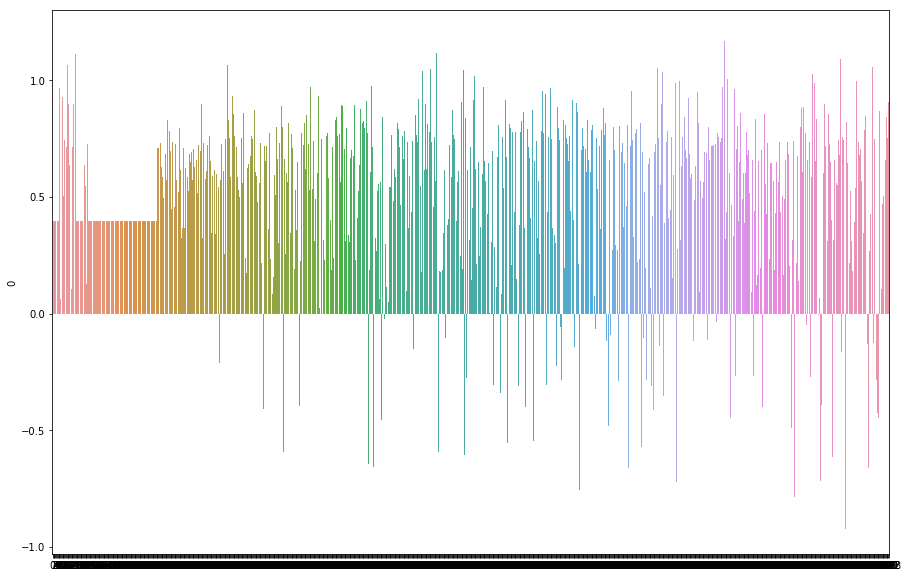

In [171]:
plt.figure(figsize=(15, 10))
sns.barplot(x = puzzle.index, y = puzzle[0])

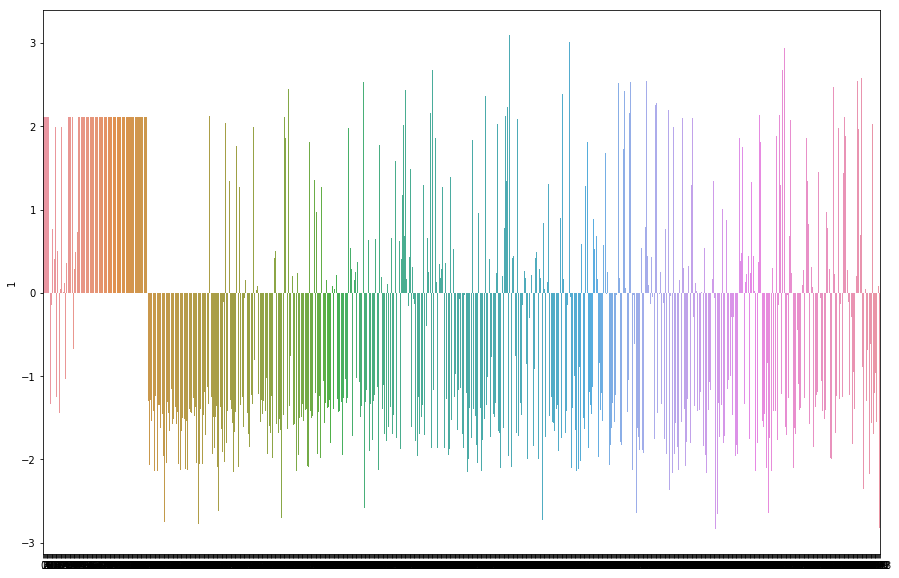

In [174]:
plt.figure(figsize=(15, 10))
sns.barplot(x = puzzle.index, y = puzzle[1])

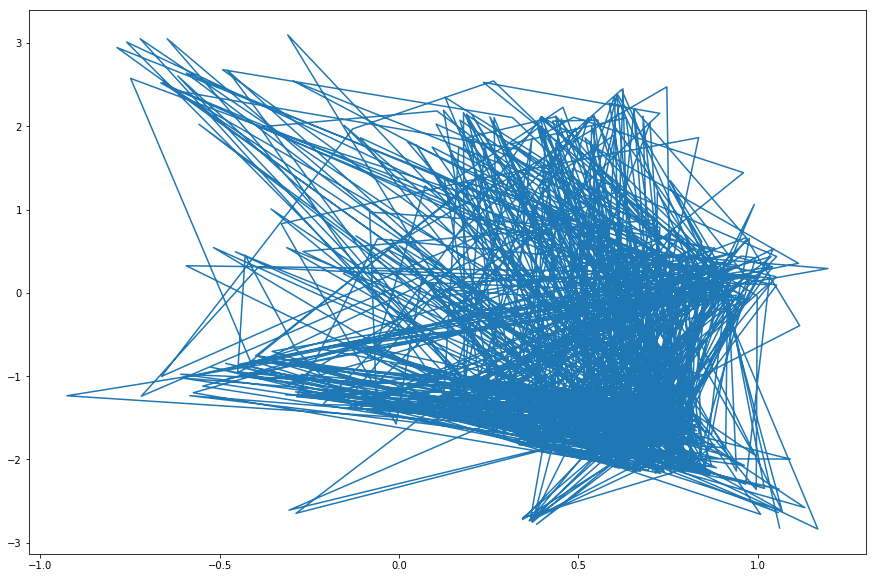

In [181]:
plt.figure(figsize=(15, 10))
plt.plot(puzzle[0], puzzle[1])

Looks like we have some sort of map (top-right plot).

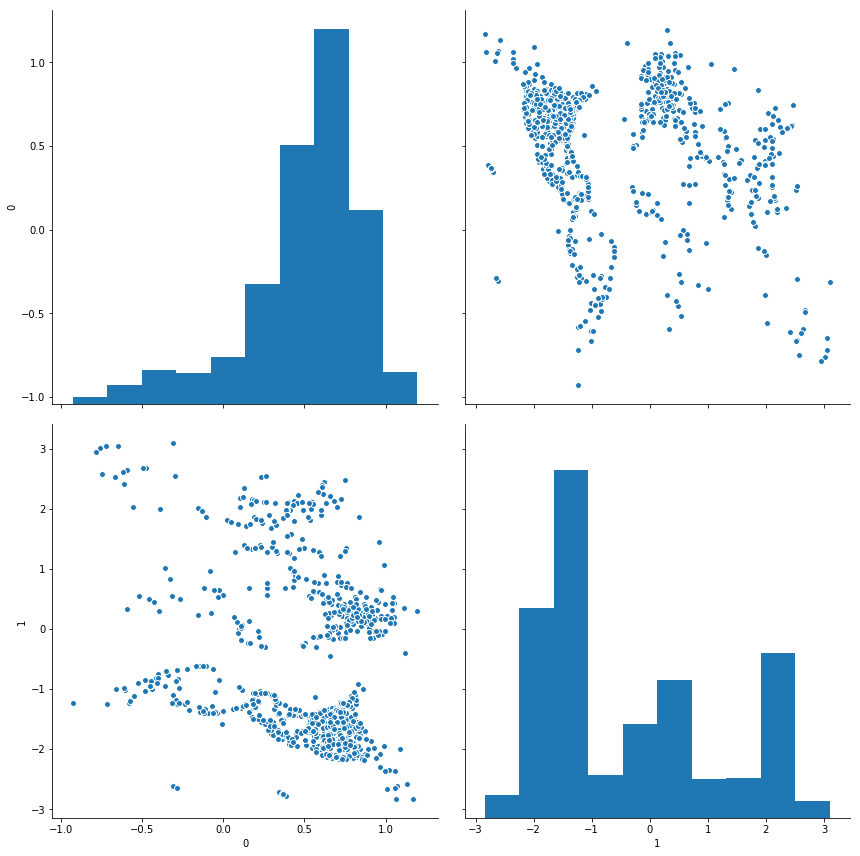

In [182]:
sns.pairplot(puzzle, size = 6)

In [183]:
puzzle = puzzle.rename(columns = {0: "Latitude", 1: "Longitude"})

Disclaimer: not my image! Taken from this website: https://alex.state.al.us/lesson_view.php?&print=friendly&id=33135

In [184]:
Image(url= "https://alex.state.al.us/uploads/33135/World-Map-Lat-Long.jpg")

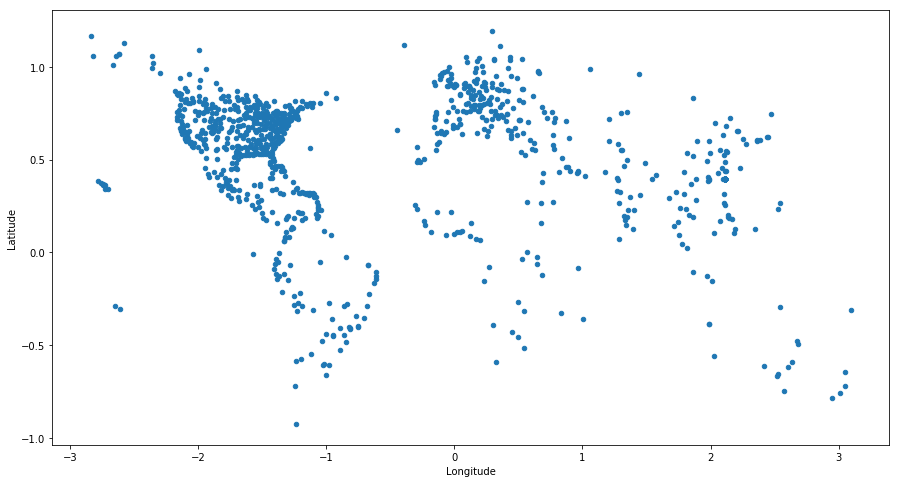

In [185]:
puzzle.plot.scatter(y = "Latitude", x = "Longitude", figsize = (15,8))

We know that latitude is from -90 to 90 and longitude goes from -180 to 180, so we can rescale our values, which go from approximately -1 to 1 (latitude) and -3 to 3 (longitude).

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler((-90, 90))

In [188]:
puzzle["Latitude"] = scaler.fit_transform(puzzle[["Latitude"]])

In [189]:
scaler = MinMaxScaler((-180, 180))

In [190]:
puzzle["Longitude"] = scaler.fit_transform(puzzle[["Longitude"]])

In [191]:
puzzle

,Latitude,Longitude
0,22.239119,120.352194
1,22.239119,120.352194
2,22.239119,120.352194
3,22.239119,120.352194
4,22.239119,120.352194
5,22.239119,120.352194
6,22.239119,120.352194
7,22.239119,120.352194
8,70.659616,-13.877754
9,-6.224204,-88.722262


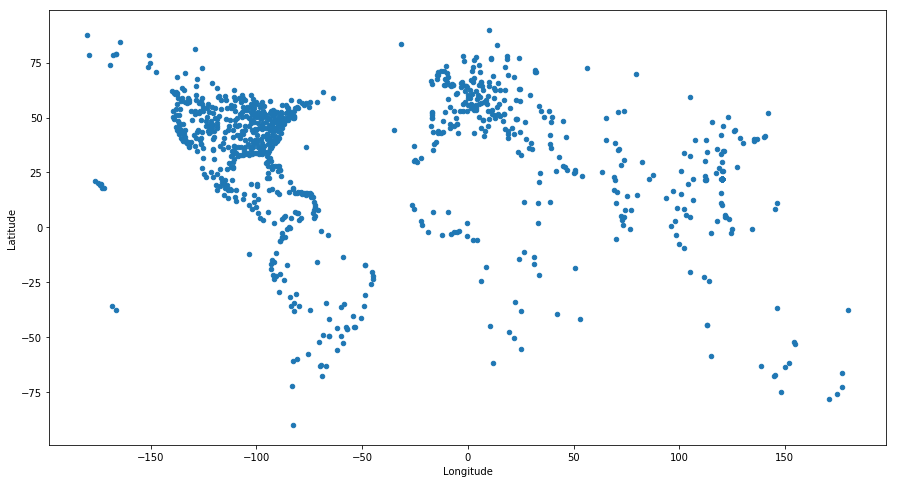

In [192]:
puzzle.plot.scatter(y = "Latitude", x = "Longitude", figsize = (15,8))

In [193]:
is_duplicated = puzzle[puzzle.duplicated()]
is_duplicated.groupby(["Latitude", "Longitude"]).size()

Latitude    Longitude  
-44.416967   112.927578      1
-17.068455  -48.651798       1
-6.224204   -88.722262       1
 22.239119   120.352194    100
 42.566356  -95.101736       1
 47.124367  -4.958054        1
 49.101204   7.271950        1
 49.235877   22.648191       1
 49.637681  -17.048538       1
 51.783851   16.927900       1
 64.514577  -0.693674        1
 64.932220  -7.121238        1
 79.159604  -166.657298      1
dtype: int64

In [194]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse("22.239119, 120.352194")

print(location.address)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


TW


So the most common location in our dataset is in Taiwan! I think we can infer that the dataset given tracks the location of our (presumably) airplane over a certain period of time, and it is mainly based in Taiwan.

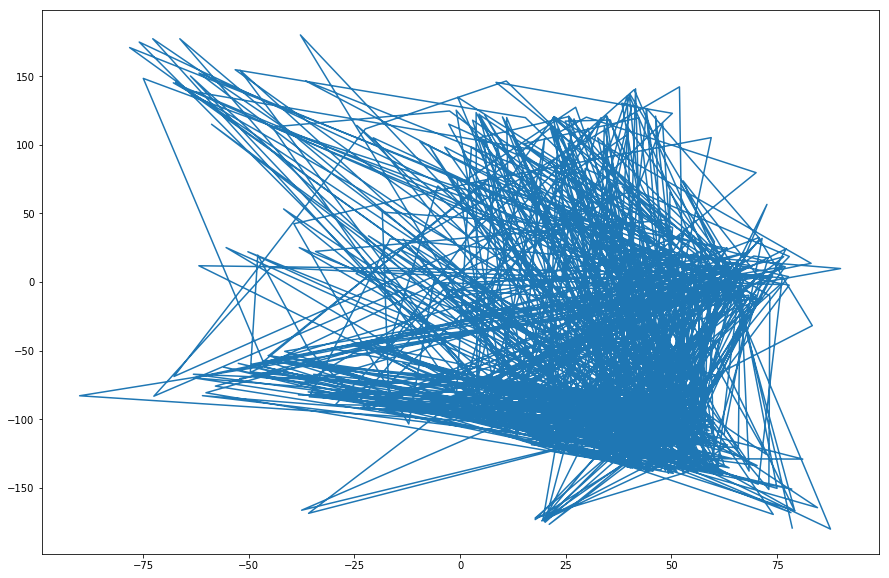

In [196]:
plt.figure(figsize=(15, 10))
plt.plot(puzzle["Latitude"], puzzle["Longitude"])